In [1]:
import numpy as np
import pandas as pd
import pyarrow.parquet as pq
import seaborn as sns
import matplotlib.pyplot as plt

import sys

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import sklearn as sk

In [2]:
#cijene = pd.read_parquet("C:/Users/vvrhovec/Veronika/mdevelop/data/parquet/cene.parquet", columns=['art','datum','redna_cena','akcijska_cena'])
#dostupnost = pd.read_parquet("C:/Users/vvrhovec/Veronika/mdevelop/data/parquet/availability.parquet")
#kolicina = pd.read_parquet("C:/Users/vvrhovec/Veronika/mdevelop/data/parquet/training/training.prodaja.parquet", columns=['art','datum','kol'])
#podaci_0 = pd.merge(cijene, dostupnost, on=['art','datum'], how='inner')
#podaci_1 = pd.merge(podaci_0, kolicina, on=['art','datum'], how='inner')
#podaci_1.describe()

#brojac = 0

#for art, new_df in podaci_1.groupby(level=0):
 #   if brojac == 5:
  #      break
   # if len(new_df.index) > 800:
    #    brojac = brojac + 1
     #   print("artikl:", art, "duljina:", len(new_df.index))   
        
#podaci_2 = podaci_1.loc[[38,39,40,41,57]]
#podaci_2.head(100)
#finalna_tablica = podaci_2

#podaci_2.sort_index(inplace=True)
#dataParquet_s = podaci_2.to_parquet('dataParquet_s.parquet')

In [3]:
#dataParquet_s = podaci.to_parquet('dataParquet.parquet')

In [4]:
podaci_s = pd.read_parquet("C:/Users/vvrhovec/Veronika/kodovi/dataParquet_s.parquet")

C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\pyarrow\pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\pyarrow\pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\pyarrow\pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [5]:
#print(podaci_s)

## Odvajanje podataka u testni i trening set

* Kako bi se izbjeglo da treniramo podatke na podacima koji su u budućnosti, ručno ćemo odvojiti podatke t.d u trening setu ostavimo podatke iz prvog četveromjesečja.

In [6]:
X_train = podaci_s.loc[podaci_s.index.get_level_values('datum') <= '2018-01-01']
X_test = podaci_s.loc[podaci_s.index.get_level_values('datum') > '2018-01-01']
y_train = X_train['kol']
y_test = X_test['kol']

In [7]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(3535, 4) (3535,)
(686, 4) (686,)


### Preprocesiranje **TRAINING** podataka

In [8]:
std_scaler = StandardScaler()

In [9]:
std_scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
X_train_scaled = std_scaler.transform(X_train)

### Fittamo model na podacima trening seta

In [11]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train_scaled, y_train)

In [12]:
predictions = model.predict(X_train_scaled)

In [13]:
print(X_train_scaled)

[[-0.73120284 -0.70742389  0.89606398 -0.47253749]
 [-0.7295619  -0.7057627   1.13654767  1.06735727]
 [ 0.36822831  0.4055762   0.22010983 -0.42280255]
 ...
 [ 1.78436124  1.83918674 -0.74182494 -0.50401531]
 [ 1.78272041  1.83752566 -1.09280114 -0.4926833 ]
 [ 1.78272041  1.83752566 -1.16429629 -0.47001927]]


In [14]:
model.score(X_train_scaled, y_train)

1.0

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [16]:
mae = mean_absolute_error(y_train, predictions)  # mjera greške
mae

3.9952802970739347e-13

In [17]:
mse = mean_squared_error(y_train, predictions)  # mjera greške
mse

2.1713856700367645e-25

### TEST 

In [18]:
X_test_scaled = std_scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

In [19]:
mae = mean_absolute_error(y_test, y_pred)
mae

3.424691693173754e-13

In [20]:
mse = mean_squared_error(y_train, predictions)
mse

2.1713856700367645e-25

In [21]:
koeficijenti = model.coef_
print(koeficijenti)

odsjecak = model.intercept_
print(odsjecak)

paramtetri = model.get_params
print(paramtetri)

[ 9.60455234e-13 -1.30739863e-12 -4.97379915e-13  1.58842024e+03]
808.588118811881
<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>


In [22]:
predictions[0:5] # prvih pet predviđenih vrijednosti

array([  58., 2504.,  137.,   36., 3883.])

Text(0, 0.5, 'predviđene količine')

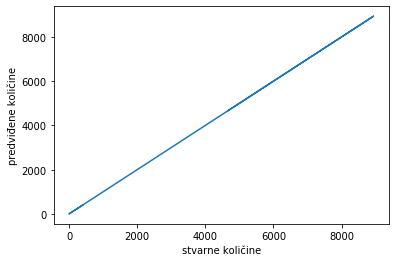

In [23]:
plt.plot(y_test, y_pred)

plt.xlabel("stvarne količine")
plt.ylabel("predviđene količine")

In [26]:
podaci_s.shape

(4221, 4)

In [27]:
n = podaci_s.shape[0]
print(n)

4221


In [28]:
nule = [0] * n

Tablici **podaci_s** dodajem stupce  _Monday_, _Tuesday_, _Wednesday_, _Thursday_, _Friday_, _Saturday_, _Sunday_ koji će za početak imati sve vrijednosti nula.
Zatim ću za svaki datum provjeriti o kojem se danu radi te u tu kolonu unijeti 1.

In [29]:
podaci_s['Monday'] = nule
podaci_s['Tuesday'] = nule
podaci_s['Wednesday'] = nule
podaci_s['Thursday'] = nule
podaci_s['Friday'] = nule
podaci_s['Saturday'] = nule
podaci_s['Sunday'] = nule

In [30]:
#podaci_s.sort_index(inplace=True)
#podaci = podaci_s
#print(podaci)

In [31]:
import datetime

podaci_s['day_of_week'] = podaci_s.index.get_level_values('datum').day_name()

In [32]:
for art, new_df in podaci_s.groupby(level=0):
   for index, row in new_df.iterrows():
       dan=row['day_of_week']
       #print(row.name[0],row.name[1].date())
       podaci_s.loc[(row.name[0],row.name[1].date()),dan] = 1

In [33]:
podaci_s['Vikend'] = np.where(podaci_s['day_of_week'] == "Saturday",1,np.where(podaci_s['day_of_week'] == "Sunday",1,0))

In [80]:
#print(podaci_s)

In [35]:
#podaci_days = podaci_s.to_parquet('podaci_days.parquet')

In [36]:
podaci_d = pd.read_parquet("C:/Users/vvrhovec/Veronika/kodovi/podaci_days.parquet")

C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\pyarrow\pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\pyarrow\pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\pyarrow\pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [68]:
#podaci_d2 = podaci_d.rename(columns={'Vikend':'Weekend'})
#podaci_d2 = podaci_d2.drop('day_of_week', axis=1)

In [75]:
print(podaci_d2)

                redna_cena  akcijska_cena  n_trgovin    kol  Monday  Tuesday  \
art datum                                                                      
38  2016-01-02       0.100          0.100        439  769.0       0        0   
    2016-01-03       0.100          0.100        436  100.0       0        0   
    2016-01-04       0.100          0.100        441  305.0       1        0   
    2016-01-05       0.100          0.100        441   79.0       0        1   
    2016-01-06       0.100          0.100        444  344.0       0        0   
    2016-01-07       0.100          0.100        441   97.0       0        0   
    2016-01-08       0.100          0.100        442  311.0       0        0   
    2016-01-09       0.100          0.100        443  541.0       0        0   
    2016-01-10       0.100          0.100        441   94.0       0        0   
    2016-01-11       0.100          0.100        444  233.0       1        0   
    2016-01-13       0.100          0.10

In [38]:
#from sklearn.preprocessing import OneHotEncoder
#enc = OneHotEncoder(handle_unknown='error')
#enc.fit(podaci_d)

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [39]:
podaci_s.sort_index(inplace=True)

In [41]:
#for art, new_df in podaci_s.groupby(level=0):
    #for index, row in new_df.iterrows():
       #print(row.name[0],row.name[1])
       #podaci_s.loc[(row.name[0],row.name[1].date()),dan] = 1

In [76]:
artikl38 = podaci_d2.loc[podaci_d2.index.get_level_values('art') == 38]
artikl39 = podaci_d2.loc[podaci_d2.index.get_level_values('art') == 39]
artikl40 = podaci_d2.loc[podaci_d2.index.get_level_values('art') == 40]
artikl41 = podaci_d2.loc[podaci_d2.index.get_level_values('art') == 41]
artikl57 = podaci_d2.loc[podaci_d2.index.get_level_values('art') == 57]

In [77]:
print(artikl38.shape,artikl39.shape,artikl40.shape,artikl41.shape,artikl57.shape)

(815, 12) (869, 12) (869, 12) (867, 12) (801, 12)


In [78]:
podaci_art38 = artikl38.to_parquet('podaci_art38.parquet')
podaci_art39 = artikl39.to_parquet('podaci_art39.parquet')
podaci_art40 = artikl40.to_parquet('podaci_art40.parquet')
podaci_art41 = artikl41.to_parquet('podaci_art41.parquet')
podaci_art57 = artikl57.to_parquet('podaci_art57.parquet')

C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\pyarrow\pandas_compat.py:114: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  result = infer_dtype(pandas_collection)


In [79]:
podaci_38 = pd.read_parquet("C:/Users/vvrhovec/Veronika/kodovi/podaci_art38.parquet")
podaci_39 = pd.read_parquet("C:/Users/vvrhovec/Veronika/kodovi/podaci_art39.parquet")
podaci_40 = pd.read_parquet("C:/Users/vvrhovec/Veronika/kodovi/podaci_art40.parquet")
podaci_41 = pd.read_parquet("C:/Users/vvrhovec/Veronika/kodovi/podaci_art41.parquet")
podaci_57 = pd.read_parquet("C:/Users/vvrhovec/Veronika/kodovi/podaci_art57.parquet")

C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\pyarrow\pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\pyarrow\pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\pyarrow\pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels
